# Data Cleaning

In [1]:
# import the libraries
import pandas as pd
from collections import Counter
import seaborn as sns
import datetime as dt
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [2]:
# We need to download all the necessary packages
# nltk.download('all') for all the packages
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91971\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the scrapped reddit csv file
data_df = pd.read_csv('../data/askscience1.csv')

In [4]:
data_df

,title,url,comms_num,flair,score,id,created,author,body
0,AskScience’s concerns regarding Reddit’s API c...,https://www.reddit.com/r/askscience/comments/1...,1,NaN,35057,147epb8,1.686544e+09,AskScienceModerator,"In April 2023, [Reddit announced they would be..."
1,When did tarantulas lose the ability to produc...,https://www.reddit.com/r/askscience/comments/1...,155,Biology,1076,14750mh,1.686517e+09,nickoskal024,"Basically, regarding the ancestor common to ta..."
2,Is arachnophobia instinctive or is it a cultur...,https://www.reddit.com/r/askscience/comments/1...,106,Psychology,132,147cno2,1.686537e+09,DarkStarStorm,NaN
3,If you charge a battery does it gain mass as i...,https://www.reddit.com/r/askscience/comments/1...,61,Physics,150,1477qmo,1.686523e+09,swingod305,NaN
4,"Are there any natural processes that ""un-fix"" ...",https://www.reddit.com/r/askscience/comments/1...,6,Earth Sciences,21,1477lpc,1.686523e+09,blindcolumn,Nitrogen is converted from a free elemental ga...
...,...,...,...,...,...,...,...,...,...
13911,why is Flonase supposed to be taken only for 6...,https://www.reddit.com/r/askscience/comments/1...,13,Medicine,14,117lr7l,1.676930e+09,risingstanding,The paperwork with Flonase says only take 6 mo...
13912,How do parrots pronounce sounds that are artic...,https://www.reddit.com/r/askscience/comments/1...,329,Biology,4553,116dj6z,1.676819e+09,boomer_wife,"I was remembering my ex’s parrot, an African g..."
13913,How do Killer T Cells Recognize Foreign Antigens?,https://www.reddit.com/r/askscience/comments/1...,6,Biology,37,117dqbb,1.676912e+09,Icarus367,I recently finished The Song of the Cell by Si...
13914,What are the most important archaeological sit...,https://www.reddit.com/r/askscience/comments/1...,2,Archaeology,8,117qir6,1.676942e+09,Sarkhana,NaN


In [5]:
# Since reddit has date in UNIX format
# We will convert it and add it to our dataframe
def getDate(created):
    return dt.datetime.fromtimestamp(created)

data_df['timestamp'] = data_df['created'].apply(getDate)

In [6]:
# Now we will check the timestamp 
data_df

,title,url,comms_num,flair,score,id,created,author,body,timestamp
0,AskScience’s concerns regarding Reddit’s API c...,https://www.reddit.com/r/askscience/comments/1...,1,NaN,35057,147epb8,1.686544e+09,AskScienceModerator,"In April 2023, [Reddit announced they would be...",2023-06-12 09:50:18
1,When did tarantulas lose the ability to produc...,https://www.reddit.com/r/askscience/comments/1...,155,Biology,1076,14750mh,1.686517e+09,nickoskal024,"Basically, regarding the ancestor common to ta...",2023-06-12 02:22:47
2,Is arachnophobia instinctive or is it a cultur...,https://www.reddit.com/r/askscience/comments/1...,106,Psychology,132,147cno2,1.686537e+09,DarkStarStorm,NaN,2023-06-12 08:01:23
3,If you charge a battery does it gain mass as i...,https://www.reddit.com/r/askscience/comments/1...,61,Physics,150,1477qmo,1.686523e+09,swingod305,NaN,2023-06-12 04:10:33
4,"Are there any natural processes that ""un-fix"" ...",https://www.reddit.com/r/askscience/comments/1...,6,Earth Sciences,21,1477lpc,1.686523e+09,blindcolumn,Nitrogen is converted from a free elemental ga...,2023-06-12 04:04:45
...,...,...,...,...,...,...,...,...,...,...
13911,why is Flonase supposed to be taken only for 6...,https://www.reddit.com/r/askscience/comments/1...,13,Medicine,14,117lr7l,1.676930e+09,risingstanding,The paperwork with Flonase says only take 6 mo...,2023-02-21 03:24:37
13912,How do parrots pronounce sounds that are artic...,https://www.reddit.com/r/askscience/comments/1...,329,Biology,4553,116dj6z,1.676819e+09,boomer_wife,"I was remembering my ex’s parrot, an African g...",2023-02-19 20:35:22
13913,How do Killer T Cells Recognize Foreign Antigens?,https://www.reddit.com/r/askscience/comments/1...,6,Biology,37,117dqbb,1.676912e+09,Icarus367,I recently finished The Song of the Cell by Si...,2023-02-20 22:28:56
13914,What are the most important archaeological sit...,https://www.reddit.com/r/askscience/comments/1...,2,Archaeology,8,117qir6,1.676942e+09,Sarkhana,NaN,2023-02-21 06:49:01


# Drop unwanted Items

In [7]:
data_df.dtypes

title                object
url                  object
comms_num             int64
flair                object
score                 int64
id                   object
created             float64
author               object
body                 object
timestamp    datetime64[ns]
dtype: object

In [8]:
# We don't need "date" column as we already added timestamp
# We will use drop function of pandas
# We are droping column so set axis=1
data_df = data_df.drop(['created'], axis=1)

In [9]:
data_df.dtypes

title                object
url                  object
comms_num             int64
flair                object
score                 int64
id                   object
author               object
body                 object
timestamp    datetime64[ns]
dtype: object

In [10]:
# Check how many null values in our dataframe
print(data_df.isnull().sum())
data_df.count()

title           0
url             0
comms_num       0
flair         182
score           0
id              0
author        308
body         3430
timestamp       0
dtype: int64


title        13916
url          13916
comms_num    13916
flair        13734
score        13916
id           13916
author       13608
body         10486
timestamp    13916
dtype: int64

In [11]:
# We can see above we have many null values
# We will drop them using panda's dropna()
# data_df = data_df.dropna()
data_df = data_df.fillna("na")

In [12]:
# Now let's check whether there are any remaining null values
print(data_df.isnull().sum())
print(data_df.count())

title        0
url          0
comms_num    0
flair        0
score        0
id           0
author       0
body         0
timestamp    0
dtype: int64
title        13916
url          13916
comms_num    13916
flair        13916
score        13916
id           13916
author       13916
body         13916
timestamp    13916
dtype: int64


In [13]:
# Let's check our df
data_df.head()

,title,url,comms_num,flair,score,id,author,body,timestamp
0,AskScience’s concerns regarding Reddit’s API c...,https://www.reddit.com/r/askscience/comments/1...,1,na,35057,147epb8,AskScienceModerator,"In April 2023, [Reddit announced they would be...",2023-06-12 09:50:18
1,When did tarantulas lose the ability to produc...,https://www.reddit.com/r/askscience/comments/1...,155,Biology,1076,14750mh,nickoskal024,"Basically, regarding the ancestor common to ta...",2023-06-12 02:22:47
2,Is arachnophobia instinctive or is it a cultur...,https://www.reddit.com/r/askscience/comments/1...,106,Psychology,132,147cno2,DarkStarStorm,na,2023-06-12 08:01:23
3,If you charge a battery does it gain mass as i...,https://www.reddit.com/r/askscience/comments/1...,61,Physics,150,1477qmo,swingod305,na,2023-06-12 04:10:33
4,"Are there any natural processes that ""un-fix"" ...",https://www.reddit.com/r/askscience/comments/1...,6,Earth Sciences,21,1477lpc,blindcolumn,Nitrogen is converted from a free elemental ga...,2023-06-12 04:04:45


In [14]:
# Check how many null values in our dataframe
print(data_df.isnull().sum())
data_df.count()

title        0
url          0
comms_num    0
flair        0
score        0
id           0
author       0
body         0
timestamp    0
dtype: int64


title        13916
url          13916
comms_num    13916
flair        13916
score        13916
id           13916
author       13916
body         13916
timestamp    13916
dtype: int64

# Let's do some Text Preprocessing

In [15]:
# Let's clean some texts
# First we will replace some special characters
# We will use python regex
# And nltk STOPWORDS for removing commonly used word (such as “the”, “a”, “an”, “in”)
# We also lower the text
# We will use PorterStemming: The Porter stemming algorithm (or ‘Porter stemmer’) is a 
# process for removing the commoner morphological and inflexional endings from words in English.
REPLACE_BY_SPACE = re.compile('[/(){}\[\]\|@,;]')
REPLACE_SYMBOL = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [16]:
# Let's define the function for cleaning
def clean_data(text):
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = REPLACE_BY_SPACE.sub(' ', text)
    text = REPLACE_SYMBOL.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

# Define string function
def stringConvert(text):
    return str(text)

In [17]:
# -------------------------------------------
# Let's apply the clean_data() to our features
# I am considering following features
# This will help us later on to test our model
# --> Title
# --> Body
# --> Comments
# -----------------------------------

# Title
data_df['title'] = data_df['title'].apply(stringConvert)
data_df['title'] = data_df['title'].apply(clean_data)

# Body
data_df['body'] = data_df['body'].apply(stringConvert)
data_df['body'] = data_df['body'].apply(clean_data)

C:\Users\91971\AppData\Local\Temp\ipykernel_33284\2578446769.py:3: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

C:\Users\91971\AppData\Local\Temp\ipykernel_33284\2578446769.py:3: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [18]:
# Let's combine some features and add it to our dataframe
# This will help us getting better insights into our model
# We will use assign() method to assign 
# We will need to use join() method to insert multiple df

# Title + Body + URL [tbu]
feature_tbu = data_df['title'] + data_df['body'] + data_df['url']
data_df = data_df.assign(feature_tbu=feature_tbu)

In [19]:
data_df.dtypes

title                  object
url                    object
comms_num               int64
flair                  object
score                   int64
id                     object
author                 object
body                   object
timestamp      datetime64[ns]
feature_tbu            object
dtype: object

In [20]:
# Let's view our dataframe
data_df.head()

,title,url,comms_num,flair,score,id,author,body,timestamp,feature_tbu
0,asksciences concerns regarding reddits api cha...,https://www.reddit.com/r/askscience/comments/1...,1,na,35057,147epb8,AskScienceModerator,april 2023 reddit announced would begin chargi...,2023-06-12 09:50:18,asksciences concerns regarding reddits api cha...
1,tarantulas lose ability produce silk weave webs,https://www.reddit.com/r/askscience/comments/1...,155,Biology,1076,14750mh,nickoskal024,basically regarding ancestor common tarantulas...,2023-06-12 02:22:47,tarantulas lose ability produce silk weave web...
2,arachnophobia instinctive culturallylearned be...,https://www.reddit.com/r/askscience/comments/1...,106,Psychology,132,147cno2,DarkStarStorm,na,2023-06-12 08:01:23,arachnophobia instinctive culturallylearned be...
3,charge battery gain mass gains energy,https://www.reddit.com/r/askscience/comments/1...,61,Physics,150,1477qmo,swingod305,na,2023-06-12 04:10:33,charge battery gain mass gains energynahttps:/...
4,natural processes unfix nitrogen,https://www.reddit.com/r/askscience/comments/1...,6,Earth Sciences,21,1477lpc,blindcolumn,nitrogen converted free elemental gaseous form...,2023-06-12 04:04:45,natural processes unfix nitrogennitrogen conve...


In [21]:
# We have done our cleaning of data
# Now let's convert it to csv for later use
data_df.to_csv('../data/processedasksciencefinal1.csv', index=False)

# Let's Plot some Graphs and Visualize

Text(0.5, 1.0, 'Flairs Distribution')

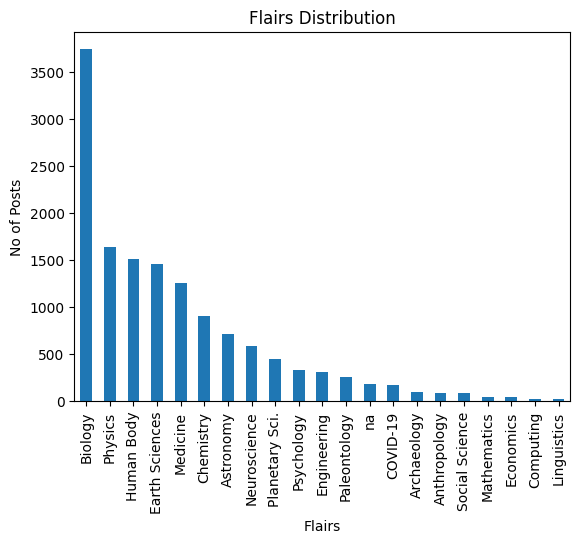

In [22]:
# Let's start with bar chart plotting each flair
# We will use matplotlib for this

data_df['flair'].value_counts().plot(kind='bar')
plt.xlabel('Flairs')
plt.ylabel('No of Posts')
plt.title('Flairs Distribution')

In [23]:
# Above Graph doen't appeal much let's use plotly
# Love Plotly
# We can interact with the graph in the jupyter itself
data_df.groupby('flair').count()['id'].iplot(kind='bar', yTitle='No of Posts', 
                                                    xTitle='Flairs',linecolor='black', title='Flairs Distribution')

In [24]:
# Let's check our flair distribution by percentage value
# I will use Plotly pie chart and we can hover over it to get the value
# We are using plotly.graph_objects which is imported as go
fig = go.Figure(data=[go.Pie(labels=data_df['flair'].unique(),
                             values=data_df.groupby('flair').count()['id'])])
fig.update_traces(hoverinfo='label+percent+value', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [25]:
# Let's do some more charts
# Don't worry Plotly got it covered :)
# We will plot distribution of Flairs based on "No of Comments"
fig = go.Figure(data=[go.Pie(labels=data_df['flair'].unique(),
                             values=data_df.groupby('comms_num').count()['id'])])
fig.update_traces(hoverinfo='label+value', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(width=0)))
fig.show()

[('would', 4214), ('like', 4144), ('na', 3430), ('know', 2660), ('https', 2464), ('im', 2380), ('question', 2254), ('one', 2002), ('water', 1596), ('could', 1554), ('also', 1526), ('dont', 1484), ('something', 1386), ('even', 1358), ('ive', 1358)]


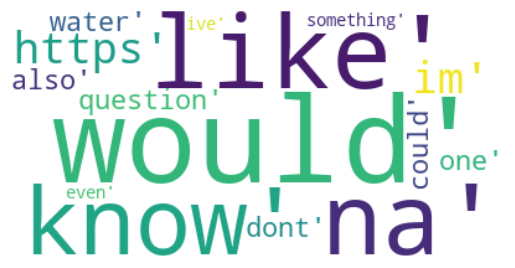

In [26]:
# Let's find out most common words in "body" column
# Most common top 15 words
commonBody = Counter(" ".join(data_df["body"]).split()).most_common(15)
print(commonBody)

# Now let's visualize it
cloud = WordCloud(max_words=15, background_color="white").generate(str(commonBody))

# Display the generated image:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[('like', 812), ('would', 630), ('animals', 588), ('water', 574), ('different', 546), ('earth', 504), ('humans', 462), ('human', 462), ('get', 420), ('years', 392), ('know', 392), ('one', 378), ('cause', 364), ('anything', 364), ('could', 350)]


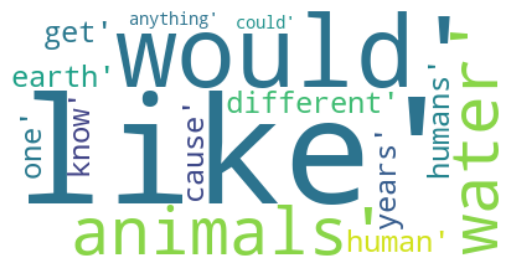

In [27]:
# Let's find out most common words in "title" column
# Most common top 15 words
commTitle = Counter(" ".join(data_df["title"]).split()).most_common(15)
print(commTitle)

# Now let's visualize it
cloud = WordCloud(max_words=15, background_color="white").generate(str(commTitle))

# Display the generated image:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()